# LAB 02 exercises

https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html  *" What Every Computer Scientist Should Know About Floating-Point Arithmetic", by David Goldberg, published in the March, 1991*

### 1\. *(done)* Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In [1]:
exa_digits = {i: str(i) for i in range(10)}
exa_digits.update({10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F'}) #Add the additional digits manually
bin_digits = {i: str(i) for i in range(2)}


end_base_dictionaries = {2: bin_digits, 16: exa_digits} # key:int (decimal number), value:str (end base digit)
start_base_dictionaries = {base: {v: k for k, v in d.items()} for base, d in end_base_dictionaries.items()} # key:str (start base digit), value:int (decimal number)
# --- this below does the same but is longer -------------
# start_base_dictionaries = {}
#for base, dict in end_base_dictionaries.items():
#    inverted_dict = {v: k for k, v in dict.items()} # Inverted dictionary (only works well if values are not duplicated)
#    start_base_dictionaries[base] = inverted_dict
    


def dec_to_base(number: str, end_base: int) -> str:
    # -------- Exception handling ------------------------------- #
    try:
        number = int(number)
    except ValueError:
        raise ValueError("dec_to_base: Invalid decimal number") #Customize ValueError message!
    if end_base== 10:
        return str(number) # Handle trivial case directly
    # Now that trivial case is ruled out, check if there is a dictionary for the end base 
    digits_dict = end_base_dictionaries.get(end_base) #This returns None if there is no dictionary, but does not raise errors, so you can customize your error message
    if digits_dict is None:
        raise ValueError("dec_to_base: End base is not supported")
    #--------- Conversion --------------------------------------- #
    a = number
    b = 0
    converted_number = ""
    while a != 0:
        b = a % end_base # division rest
        a = a // end_base # division result
        #print(a, b)
        converted_number += digits_dict[b]
    converted_number = "".join(reversed(converted_number))
    return converted_number

def base_to_dec(number:str, start_base: int) -> str:
    # ------------------ Exception handling ------------------ #
    # Trivial case: start_base == 10
    if start_base== 10:
        try:
            number = int(number)
        except ValueError:
            raise ValueError("dec_to_base: Invalid decimal number") #Customize ValueError message!
        return str(number)
    # Trivial case ruled out: check if there is a dictionary for the start base 
    digits_dict = start_base_dictionaries.get(start_base) #key:str, value: int
    if digits_dict is None:
        raise ValueError("base_to_dec: Start base is not supported")
    # Check if number is valid in start base.
    if not bool(all([digit in digits_dict.keys() for digit in number])):
        raise ValueError("base_to_dec: Number has invalid digits in the specified base.")
    # ----------------------- Conversion --------------------- #
    converted_number = sum(start_base**(len(number) - 1 -i)* digits_dict[digit] for i,digit in enumerate(number))
    # Or, equivalently:
    #converted_number = sum(start_base**i * digits_dict[digit] for i,digit in enumerate(reversed(number)))
    # Or, also equivalently:
    #converted_number = 0
    #for i, digit in enumerate(number):
    #    exponent = (len(number) - 1) -i
    #    converted_number+= (start_base**exponent) * digits_dict[digit]
    return str(converted_number)



def convert(number: str, start_base: int, end_base:int) -> str:
    if start_base == 10:
        return dec_to_base(number, end_base=end_base) #call directly
    elif end_base == 10:
        return base_to_dec(number, start_base= start_base)
    else:
        return  dec_to_base(number= base_to_dec(number, start_base= start_base), end_base=end_base) #do start base->dec->end base

c = convert("1001", start_base= 16, end_base= 10)
print(c)

4097


### 2\. *(done)* Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [2]:
def floating_to_decimal(word: str) -> float:
    try: 
        word = str(word)
    except ValueError:
        raise ValueError("The number must be provided as str or str-recastable type.")
    
    if len(word) != 32 or any(char not in '01' for char in word):
            raise ValueError("The number must have length 32 and contain only 0s and 1s")
    
    sign = int(word[0]) #1 bit
    exponent = int(word[1:9], 2) #8 bits, convert to decimal
    mantissa = int(word[9:32], 2) #23 bits, convert to decimal
    number = (-1) ** sign * float("1." + str(mantissa)) * 2 ** (exponent- 127)
    return number


word = "1"+ f"{127:08b}" +f"{3456784:023b}" #all decimals given here
print("word: ", word)
print("number:", floating_to_decimal(word)) # -1.1


word:  10111111101101001011111100010000
number: -1.3456784


In [3]:
# Recap: shift operators

a = 8 #1000
b = a << 2 #100000
print(f"{b:08b}", b) # binary, decimal

# what if a is given in binary?
a = "1000"
b = int(a, 2) << 2 #100000
print(f"{b:08b} or {bin(b)}", b) # binary, decimal

00100000 32
00100000 or 0b100000 32


### 3\. *(done)* Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [4]:
# Check the true underflow / overflow limits

from math import ulp
from sys import float_info # a named tuple containing info about the float type
print("Base for the representation: ", float_info.radix)
print(f"Number of digits in the mantissa (including the leading digit):", float_info.mant_dig, end = '\n\n')
print(f"Overflow limit:", float_info.max)
print(f"Theoretical: {2**1023 * (2 - 2**-52):e}")
print("Great!", end = '\n\n')
print(f"Underflow limit:", float_info.min) #normalized (first digit of mantissa is 1)
print(f"Theoretical: {2**-1022 * (1):e}")
print(f"Theoretical: {2**1023 * (2 - 2**-52):e}")
print("Great!", end = '\n\n')
print(f"Machine precision: ", float_info.epsilon ) #difference between 1.0 and the least value greater than 1.0 that is representable as a float

Base for the representation:  2
Number of digits in the mantissa (including the leading digit): 53

Overflow limit: 1.7976931348623157e+308
Theoretical: 1.797693e+308
Great!

Underflow limit: 2.2250738585072014e-308
Theoretical: 2.225074e-308
Theoretical: 1.797693e+308
Great!

Machine precision:  2.220446049250313e-16


Now the exercise itself:

In [5]:
from math import inf
a, b = 1., 1.
type(a)

#Check overflow limit
for exp in range(1025):
    a *= 2
    if a == inf:
        print(f"Overflow exponent: {exp }")
        break

#Check underflow limit
for exp in range(2048):
    b /= 2
    if b == 0:
        print(f"Underflow exponent: {exp }")
        break


Overflow exponent: 1023
Underflow exponent: 1074


**Comment**: the underflow limit is smaller than theoretically expected. The difference arises because the IEEE 754 floating-point standard supports denormalized (or subnormal) numbers, which extend the representable range below the smallest normalized number.
When the exponent reaches its minimum value (-1022), the system allows the leading 1. of the mantissa to become 0.. These are denormalized numbers, with the form:

$$
x = 0.\text{mantissa} \times 2^{-1022}.
$$

This effectively allows the exponent to drop further, extending the range of representable numbers down to:

$$
2^{-1022 - 52} = 2^{-1074} \approx 4.94 \times 10^{-324}.
$$

### 4\. *(done)* Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [6]:
a = 1.
for exp in range(64):
    b = a + 2** -exp 
    if b == a:
        print(f"Machine precision: {2** -exp:e}")
        break
print(f"rounding method: {float_info.rounds}") # 1= to nearest
print(f"Theoretical expectation: {2**(-52 - 1):e}") # to account for the rounding method "to nearest" GREAT!

Machine precision: 1.110223e-16
rounding method: 1
Theoretical expectation: 1.110223e-16


### 5\. (done) Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

*Answer: the upper root is inaccurate when computed using the standard formula, because of cathastrophic cancellation happening https://en.wikipedia.org/wiki/Catastrophic_cancellation .*

*Computation of $\sqrt{\Delta^2}$ produces an approximation error. Although the relative error on $\sqrt{\Delta^2}$ might be very small, the* **relative** *error on the numerator $b - \sqrt{\Delta^2}$ is not, because the numbers are very close. In this sense, subtraction **amplifies** the approximation error. In the alternative method, instead, there is no subtraction of close values.*

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [7]:
# Here b is positive, therefore I expect cancellation issues for the upper root

a = 0.001
b = 10000
c = 0.001

import numpy as np
def root(a, b, c):
    delta = np.sqrt(b**2 - 4*a*c)
    up = (-b + delta)/ (2*a)
    down = (-b - delta)/ (2*a)
    return up, down


def another_root(a , b, c):
    delta = np.sqrt(b**2 - 4*a*c)
    up = (2*c)/ (-b - delta)
    down = (2*c)/ (-b + delta)
    return up, down

up, down = root(a, b, c)
print("naive way: \n", up, down)

alt_up, alt_down = another_root(a, b, c)
print("stable way: \n", alt_up, alt_down)

print(f"relative error on upper root: {(up - alt_up) / alt_up}")

# Accurately in all cases
# Depending on the sign of b, use the alternative formulation to
# compute the lower or upper branch

def accurate_root(a, b, c):
    if b > 0:
        up, _ = another_root(a, b, c)
        _, down = root(a, b, c)
    else:
        _, down = another_root(a, b, c)
        up, _ = root(a, b, c)
    return up, down

naive way: 
 -1.000444171950221e-07 -9999999.9999999
stable way: 
 -1.00000000000001e-07 -9995560.252509091
relative error on upper root: 0.000444171950211044


### 6\. (done) Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

*Answers: the numeric derivative calculated at $\delta = 10^{−2}$ does not agree perfectly with the analytic result because, of course, the analytic definition involves the limit $\delta \to 0$. Indeed, the accuracy improves for smaller $\delta$, but it worsen again for $\delta$ too small. In this case,rounding errors happen when evaluating $f(x = 1 + \delta)$: this leads first to a larger estimate $\delta = 1.e-15,\quad   f'(1) = 1.110223$ and, finally, to $f'(1) = 0$ for $\delta \leq 1.e-16$.

1.000000e-01,        1.100000
1.000000e-02,        1.010000
1.000000e-03,        1.001000
1.000000e-04,        1.000100
1.000000e-05,        1.000010
1.000000e-06,        1.000001
1.000000e-07,        1.000000
1.000000e-08,        1.000000
1.000000e-09,        1.000000
1.000000e-10,        1.000000
1.000000e-11,        1.000000
1.000000e-12,        1.000089
1.000000e-13,        0.999201
1.000000e-14,        0.999201
1.000000e-15,        1.110223
1.000000e-16,        0.000000
1.000000e-17,        0.000000


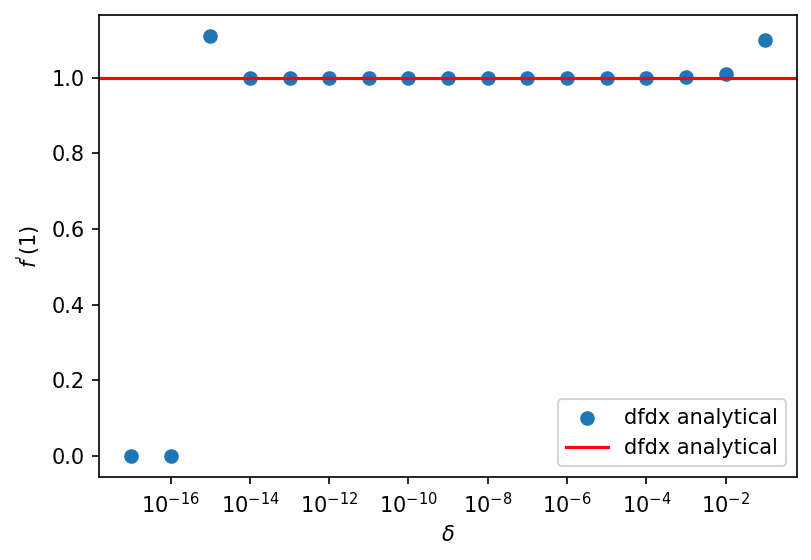

In [20]:
def f(x):
    return x**2 - x

dfdx = 1
delta_range = np.array([10**-exp for exp in range(1, 18, 1)])

num_dfdx = np.array([ ( f(1 + delta) -f(1) ) / delta for delta in delta_range])
relative_error = np.abs(num_dfdx - 1)
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize = (6,4), dpi = 150) # DPI = Dots Per Inch
ax.scatter(x = delta_range, y = num_dfdx, label = "dfdx analytical")
ax.axhline(y = 1, color ='red', label = "dfdx analytical")
ax.set_xscale('log')
ax.set_xlabel(r"$\delta$")
ax.set_ylabel(r"$f^'(1)$")
ax.legend(loc = 'lower right')

for i in range(len(delta_range)):
    print(f"{delta_range[i]:e}, {num_dfdx[i]:15f}")

### 7\. (done) Consider the area of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt{1-x^2}\,{\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.570796...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [26]:
def f(x):
    return np.sqrt(1 - x**2)

def integrate(start, stop, N, func):
    delta_x = np.abs(stop - start) / N
    x_points = np.arange(start= start, stop= stop- delta_x, step= delta_x)
    y_points = np.array([func(x) for x in x_points])
    integral = np.sum(y_points) * delta_x
    if stop > start:
        return integral
    else:
        return - integral

true_integral = np.pi/2  
integral = integrate(start = -1, stop = +1, N = 100, func= f)

N_array = np.array([10**exp for exp in range(2, 5)])
integral_array = np.array([integrate(start = -1, stop = +1, N = N, func= f) for N in N_array])
for i, N in enumerate(N_array):
    print( N, '%.15f' % (integral_array[i]), '%.15f' % ( (integral_array[i] - true_integral)/true_integral ) )

100 1.565154305800822 -0.003591822120941
1000 1.570617310656035 -0.000113965213572
10000 1.570790663915463 -0.000003605101016


In [36]:
import timeit # Python timeit module, allows for information storage
results = []
for N in np.array([10**exp for exp in range(2, 8)]):
    setup_code = f"""
from __main__ import integrate, f, np
N = {N}
start, stop = -1, 1
"""
    stmt = "integrate(start=start, stop=stop, N=N, func=f)"
    time_taken = timeit.timeit(stmt, setup=setup_code, number=10) / 10  # Average over 10 runs
    results.append((N, time_taken))
    print(f"N: {N:e}, Time: {time_taken:.6f} seconds")

N: 1.000000e+02, Time: 0.000152 seconds
N: 1.000000e+03, Time: 0.001092 seconds
N: 1.000000e+04, Time: 0.008559 seconds
N: 1.000000e+05, Time: 0.047965 seconds
N: 1.000000e+06, Time: 0.486768 seconds
N: 1.000000e+07, Time: 4.935529 seconds


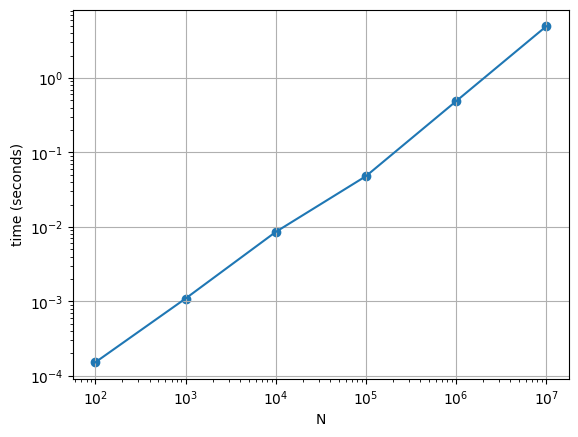

In [54]:
N_array = [results[i][0] for i in range(len(results))]
time_array = [results[i][1] for i in range(len(results))]

fig, ax = plt.subplots()
ax.plot(N_array, time_array)
ax.scatter(N_array, time_array)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("N")
ax.set_ylabel("time (seconds)")
ax.grid()

The scaling is approximately linear with N, at least on this range. $N=10e8" is expected to run for approximately one minute. 

In [57]:
N_array = [10e2, 10e6]
integral_array = [integrate(start = -1, stop = +1, func = f, N = N) for N in N_array]
relative_error = [(integral_array[i] - true_integral)/true_integral  for i in range(len(integral_array))]

In [68]:
print(f"True value: {true_integral:.15f}")
for i, N in enumerate(N_array):
    print( N, '%.15f' % (integral_array[i]), '%.e' % (relative_error[i]) )

True value: 1.570796326794897
1000.0 1.570617310656035 -1e-04
10000000.0 1.570796326570690 -1e-10
